# 1. Library & Dataset Import

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv("kaggle_boston_price.csv")
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


# 2. EDA(Exploratory Data Analyis : 탐색적 데이터분석)

 ## 2.1 : 결측값 확인

In [3]:
df.isnull().sum()

TOWN       0
LON        0
LAT        0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


 ## 2.2 : 회귀분석 종속(목표)변수 탐색
  - Y : CMEDV (집값)

In [21]:
df["CMEDV"].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

<Axes: >

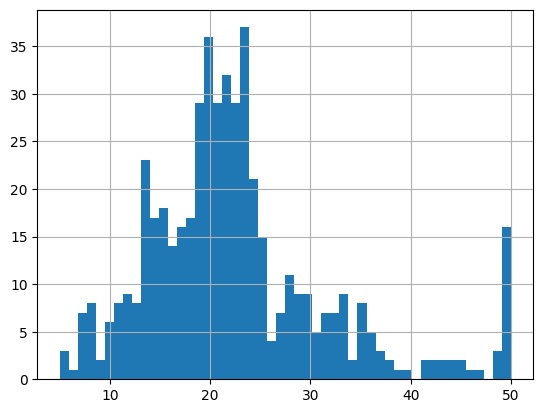

In [6]:
df["CMEDV"].hist(bins=50)
# y값의 형태가 이런식으로 표현되는구나를 확인, 이상값은 없는지도 체크

<Axes: >

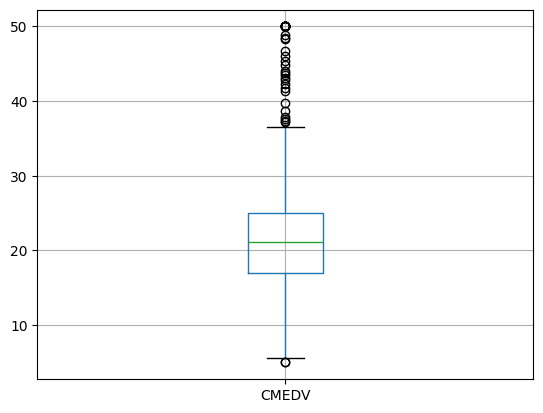

In [7]:
df.boxplot(column=["CMEDV"])

## 2.3 회귀분석 독립(설명)변수 탐색

In [8]:
df.columns

Index(['TOWN', 'LON', 'LAT', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
       'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [22]:
numerical_cols = df.columns[4:]
numerical_cols

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

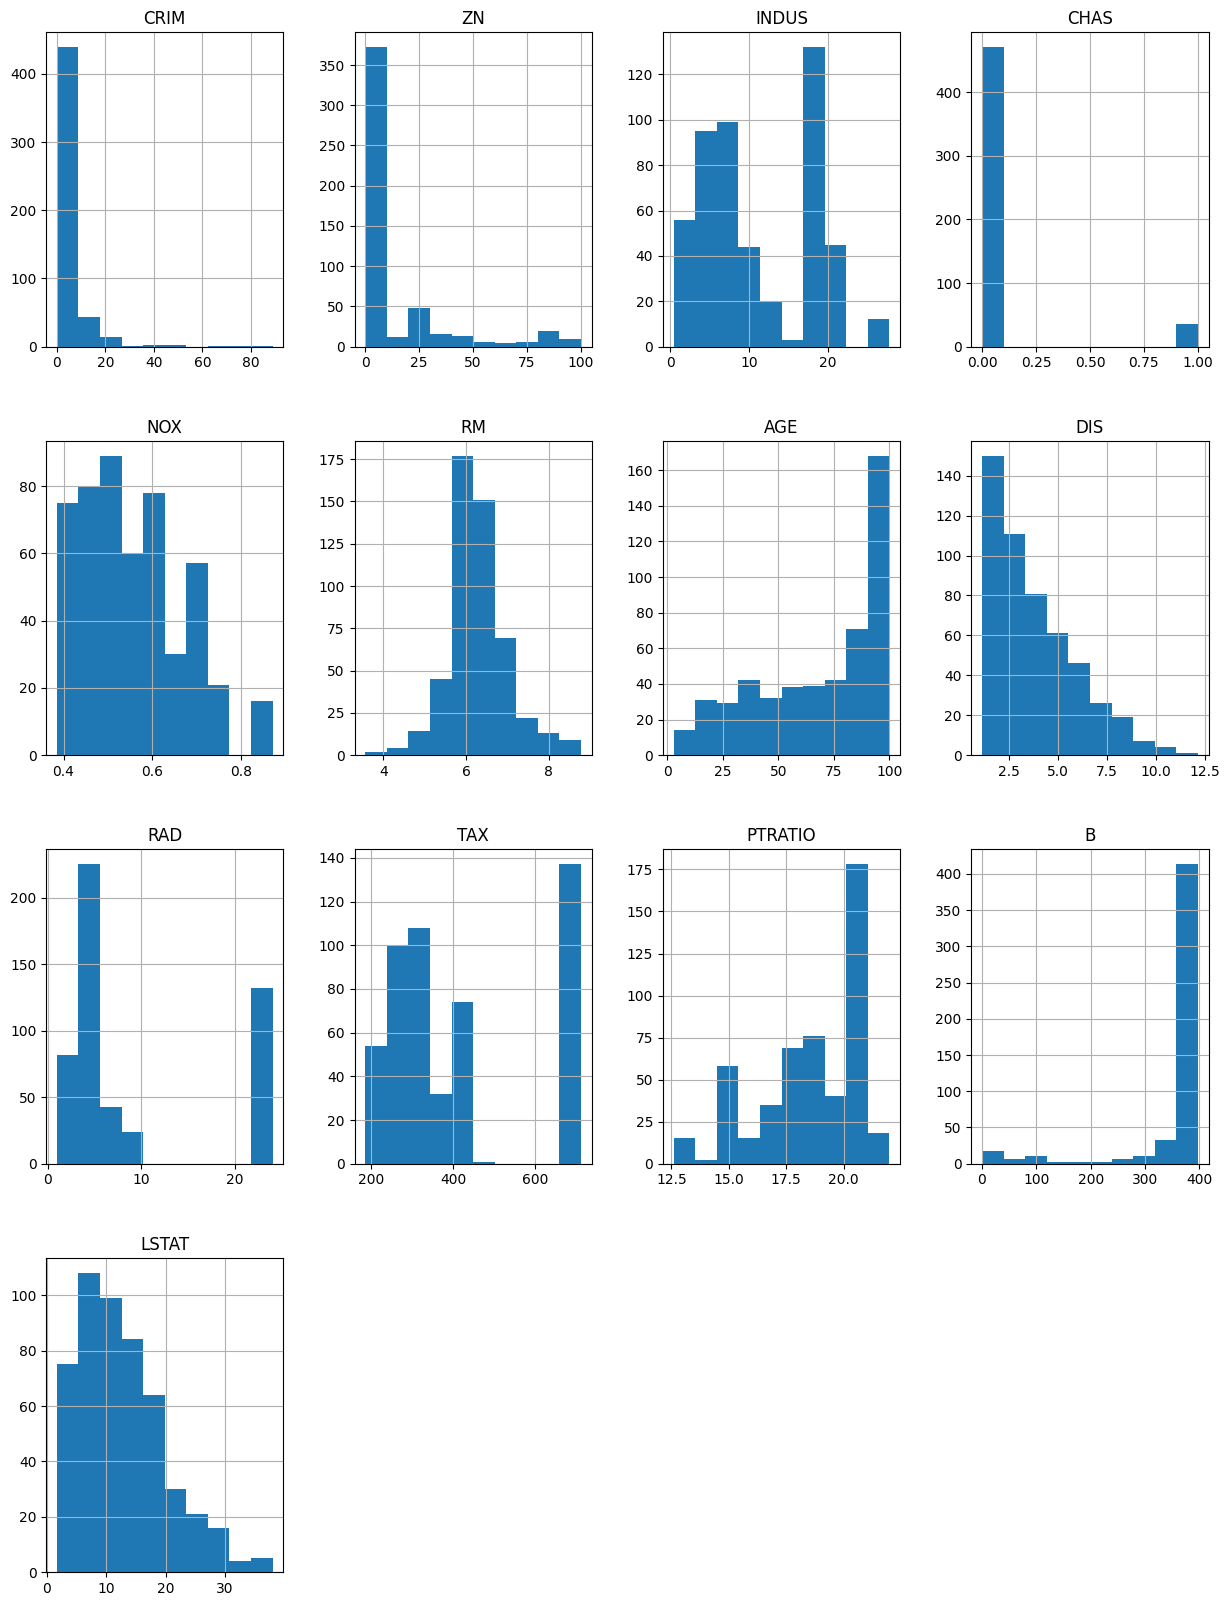

In [23]:
fig = plt.figure(figsize=(15,20))
ax = fig.gca()
df[numerical_cols].hist(ax=ax)
plt.show()

- 설명변수들의 상관관계 분석
  - Y값과 상관성이 높은 변수들을 선별

In [14]:
df.columns

Index(['TOWN', 'LON', 'LAT', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
       'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [24]:
cols = list(df.columns[3:])

corr = df.loc[:,cols].corr(method="pearson")

corr

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CMEDV,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
CRIM,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249315,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.384766,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


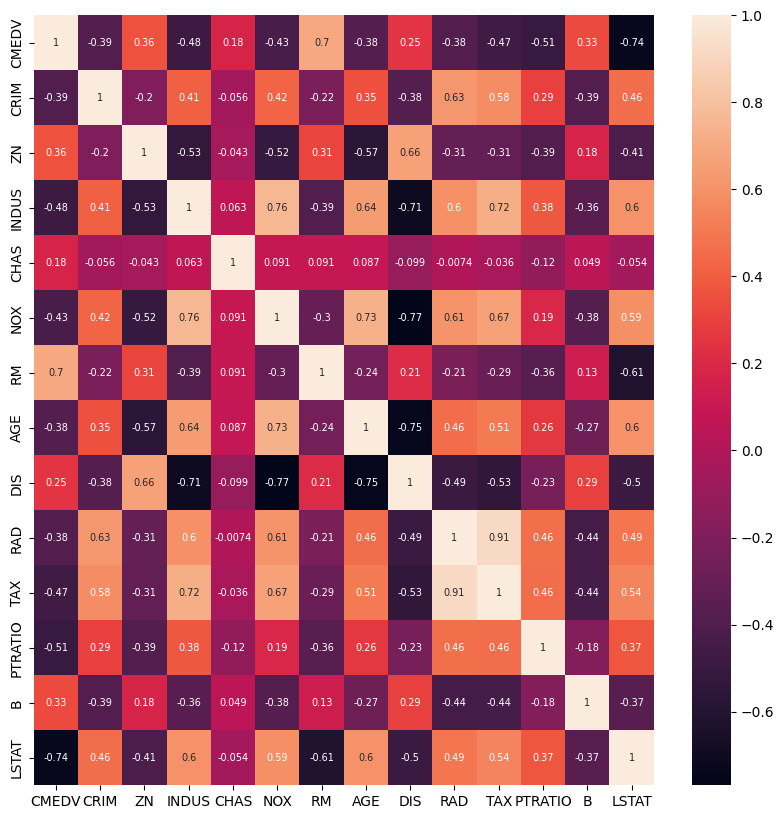

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(corr.values,
            annot=True,
            fmt='.2g',
            annot_kws={"size":7},
            yticklabels=cols,
            xticklabels=cols)
plt.show()

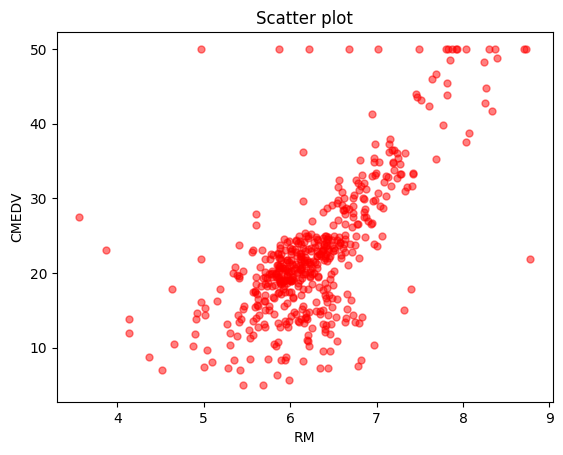

In [36]:
plt.plot("RM", "CMEDV",
         linestyle="none",
         data=df,
         marker='o',
         markersize=5,
         color='red',
         alpha=0.5)
plt.title("Scatter plot")
plt.xlabel("RM")
plt.ylabel("CMEDV")
plt.show()

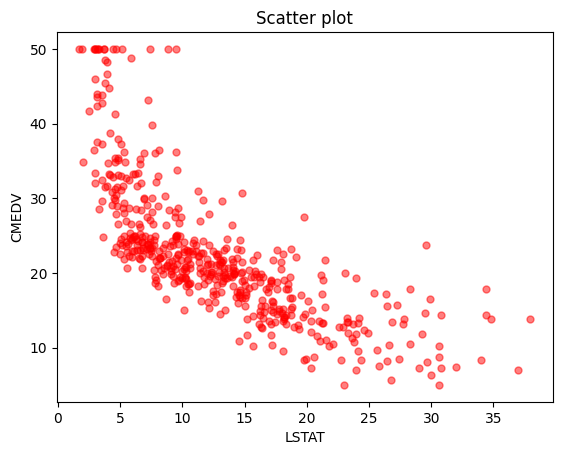

In [37]:
plt.plot("LSTAT", "CMEDV",
         linestyle="none",
         data=df,
         marker='o',
         markersize=5,
         color='red',
         alpha=0.5)
plt.title("Scatter plot")
plt.xlabel("LSTAT")
plt.ylabel("CMEDV")
plt.show()

 ## 2.4 지역별 차이 탐색

In [40]:
df["TOWN"].value_counts()

TOWN
Cambridge            30
Boston Savin Hill    23
Lynn                 22
Boston Roxbury       19
Newton               18
                     ..
Duxbury               1
Hull                  1
Hanover               1
Norwell               1
Cohasset              1
Name: count, Length: 92, dtype: int64

<Axes: >

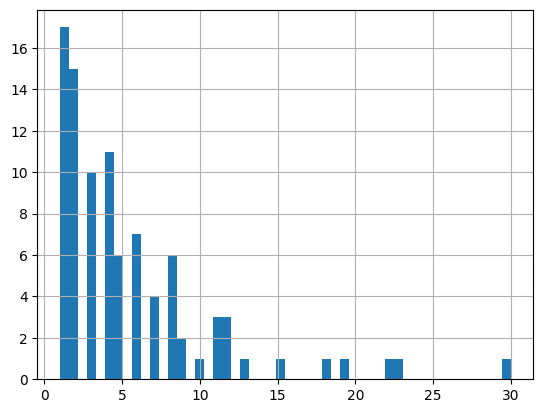

In [41]:
df["TOWN"].value_counts().hist(bins=50)

 ## 2.5 지역별로 집값의 변화가 있는지가 궁금하다면?

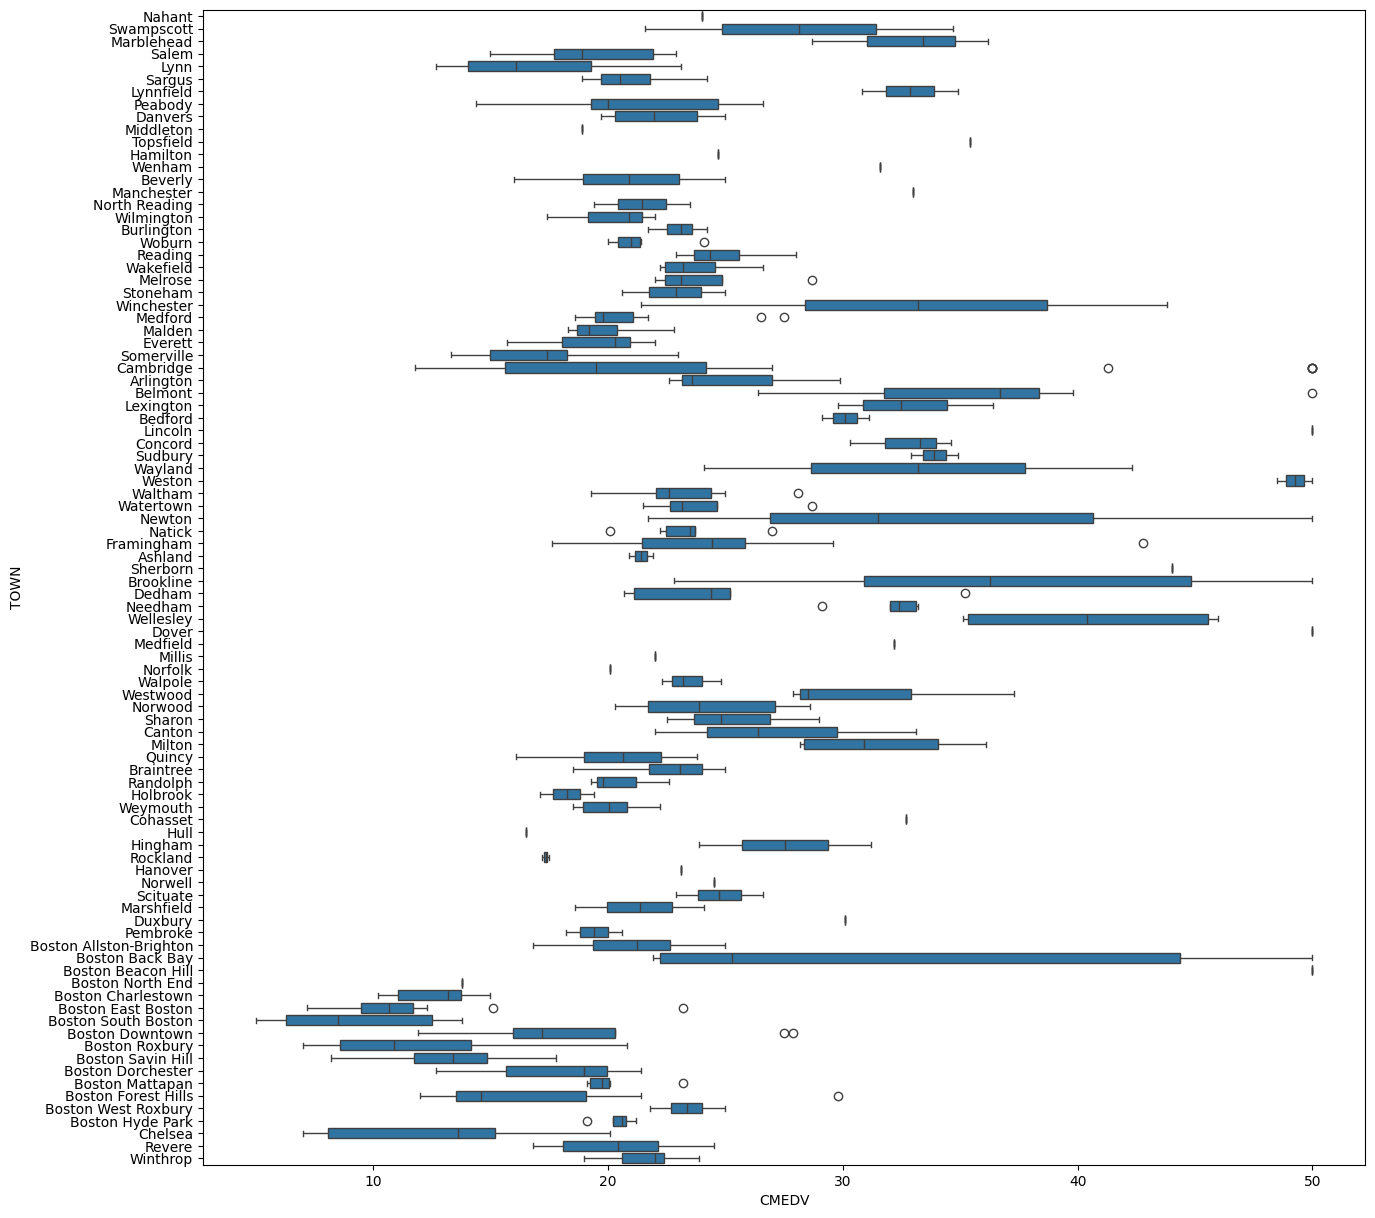

In [43]:
plt.figure(figsize=(15,15))
sns.boxplot(x="CMEDV", y="TOWN", data=df)
plt.show()

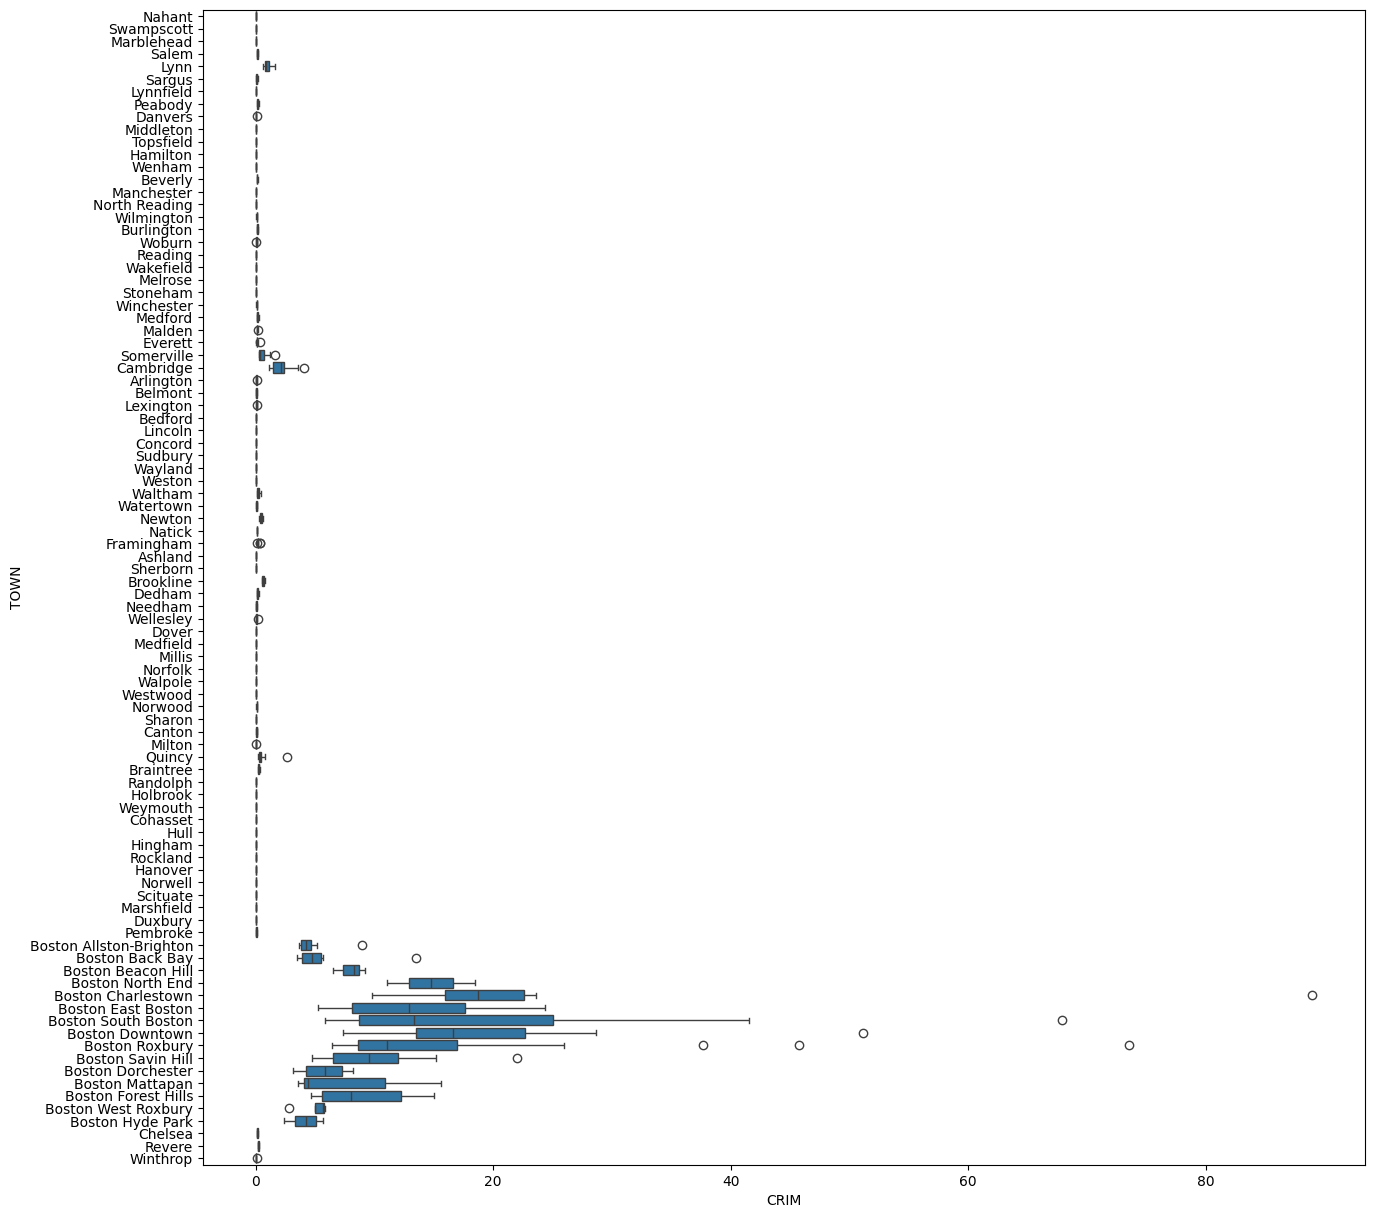

In [45]:
plt.figure(figsize=(15,15))
sns.boxplot(x="CRIM", y="TOWN", data=df)
plt.show()

# 3. 집값 예측 분석 : 회귀분석
   - 데이터 전처리
     : Scaling
     : Train / Test Dataset 분리
   - Model 학습
   - 학습 결과 해석
     : R2 Score, RMSE, MAE 출력/해석
     : Feature 유의성 검증(통계모형 Summary 출력/해석)
       -> 다중공선성 확인
       -> 해석된 결과를 가지고, ML Model 재학습

In [78]:
from sklearn.preprocessing import StandardScaler

#feature standardization
scaler = StandardScaler()
scale_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
       'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df[scale_columns] = scaler.fit_transform(df[scale_columns])
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,Swampscott,-70.950,42.2875,21.6,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,Swampscott,-70.936,42.2830,34.7,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,Marblehead,-70.928,42.2930,33.4,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,Marblehead,-70.922,42.2980,36.2,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [79]:
#데이터셋 분리
from sklearn.model_selection import train_test_split

x = df[scale_columns]
y = df["CMEDV"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=27)

In [69]:
#회귀모델 학습
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(x_train, y_train)


In [70]:
#print coef
print(lr.coef_)

[-1.1654532   0.98334242 -0.05405115  0.85776148 -1.48821317  3.31029283
 -0.32694807 -2.95794312  2.51213706 -1.85491025 -1.80378045  1.26299152
 -3.20771188]


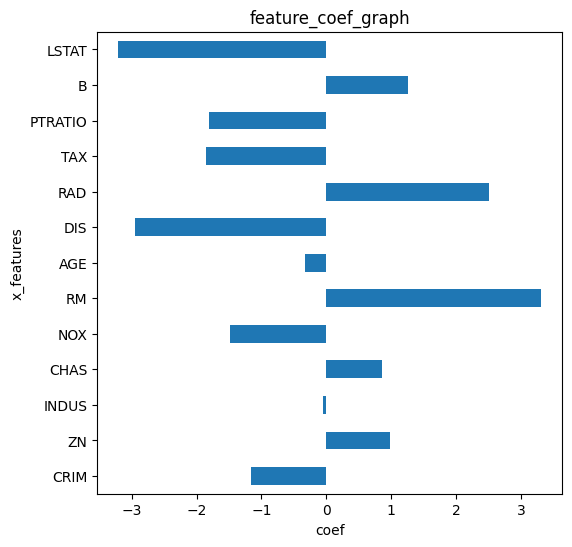

In [71]:
plt.figure(figsize=(6,6))

# graph values
coefs = lr.coef_.tolist()
coefs_series = pd.Series(coefs)

#graph info
x_labels = scale_columns
ax = coefs_series.plot.barh()
ax.set_title("feature_coef_graph")
ax.set_xlabel("coef")
ax.set_ylabel("x_features")
ax.set_yticklabels(x_labels)
plt.show()

In [73]:
#학습결과 해석
# print r2 score
from sklearn import metrics

print(lr.score(x_train, y_train)) #acc
print(lr.score(x_test, y_test))

# print mse
y_predictions = lr.predict(x_test)
print("MSE", metrics.mean_squared_error(y_test, y_predictions))
print("RMSE",metrics.root_mean_squared_error(y_test, y_predictions))
print("MAE",metrics.mean_absolute_error(y_test, y_predictions))

0.7516783995332308
0.7104409723691183
MSE 25.952026509296424
RMSE 5.094313153831086
MAE 3.383195052945632


In [74]:
# 피처 유의성 검정
import statsmodels.api as sm

x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     79.17
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           2.13e-94
Time:                        12:17:54   Log-Likelihood:                -1035.0
No. Observations:                 354   AIC:                             2098.
Df Residuals:                     340   BIC:                             2152.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5123      0.245     91.802      0.000      22.030      22.995
CRIM          -1.1655      0.332     -3.512      0.001      -1.818      -0.513
ZN             0.9833      0.375      2.622      0.009       0.246       1.721
INDUS         -0.0541      0.491     -0.110      0.912      -1.020       0.912
CHAS           0.8578      0.271      3.164      0.002       0.324       1.391
NOX           -1.4882      0.524     -2.841      0.005      -2.519      -0.458
RM             3.3103      0.356      9.287      0.000       2.609       4.011
AGE           -0.3269      0.428     -0.764      0.445      -1.168       0.514
DIS           -2.9579      0.480     -6.166      0.000      -3.901      -2.014
RAD            2.5121      0.672      3.739      0.000       1.191       3.834
TAX           -1.8549      0.736     -2.521      0.012      -3.302      -0.408
PTRATIO       -1.8038      0.320     -5.636      0.000      -2.433      -1.174
B              1.2630      0.286      4.411      0.000       0.700       1.826
LSTAT         -3.2077      0.430     -7.456      0.000      -4.054      -2.361
==============================================================================
Omnibus:                      131.886   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              684.485
Skew:                           1.489   Prob(JB):                    2.32e-149
Kurtosis:                       9.127   Cond. No.                         9.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# 다중공선성 확인 = (VIF : 1 ~ 5까지는 정상, 6 ~ 10까지는 후보군, 11 ~ end까지는 다중공선성 발생을 의미함) 다중공선성 = 분산이 겹치는 것
# 다중공선성이 발생 하게 되면 Model의 r2 값이 거짓이다
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF_FACotr"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["feature"] = x_train.columns
vif.round(2)

,VIF_FACotr,feature
0,1.01,const
1,1.64,CRIM
2,2.38,ZN
3,3.95,INDUS
4,1.07,CHAS
5,4.64,NOX
6,2.03,RM
7,3.02,AGE
8,4.05,DIS
9,7.21,RAD


## 3.1 집값 예측 분석 : 릿지(L2-Norm) 회귀실습

In [90]:
from sklearn.linear_model import Ridge, Lasso
#하이퍼파라미터 알파값 초기화
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

alpha = 0.5 #0.1, 0.5

#Ridge Class Object 생성(깡통모델 만들기)
ridge = Ridge(alpha=alpha)

#학습
ridge.fit(x_train, y_train)

Ridge(alpha=0.5)

In [94]:
y_pred = ridge.predict(x_test)

#학습검증
print(ridge.score(x_train, y_train)) #acc
print(ridge.score(x_test, y_test))

print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE",metrics.root_mean_squared_error(y_test, y_pred))
print("MAE",metrics.mean_absolute_error(y_test, y_pred))

0.7496516342291861
0.7208167480310439
MSE 31.913675220182455
RMSE 5.649218992053898
MAE 3.911464249387631


In [95]:
print(ridge.coef_)

[-0.83214231  0.93848134 -0.39971226  0.88812173 -2.00018904  2.55492071
 -0.15885751 -2.93117997  2.11210351 -1.63960235 -1.7605208   0.60627708
 -3.60137467]


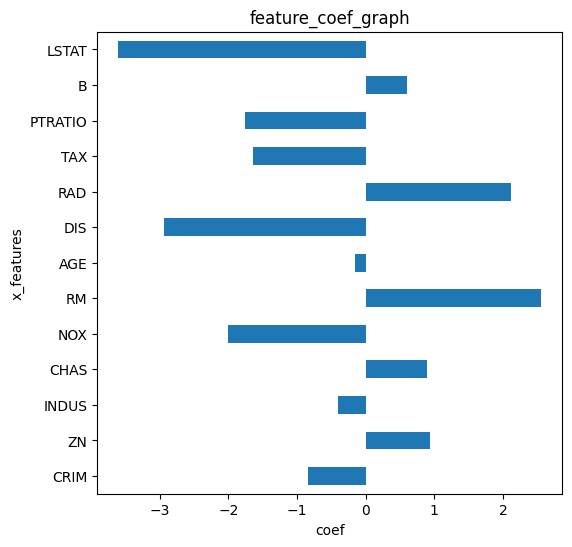

In [96]:
plt.figure(figsize=(6,6))

# graph values
coefs = ridge.coef_.tolist()
coefs_series = pd.Series(coefs)

#graph info
x_labels = scale_columns
ax = coefs_series.plot.barh()
ax.set_title("feature_coef_graph")
ax.set_xlabel("coef")
ax.set_ylabel("x_features")
ax.set_yticklabels(x_labels)
plt.show()

## 3.2 집값 예측 분석 : 라쏘(L1-Norm) 회귀 실습

0.7602637247332011
0.6668657643625366
MSE 26.534113607482507
RMSE 5.15112741130352
MAE 3.176497424965445
[-0.75612419  0.55641441 -0.06268814  0.9249658  -1.4843282   3.5264104
 -0.21628381 -2.34949221  0.9569155  -0.83913849 -1.82103599  0.77957609
 -3.00361753]


[Text(0, 0, 'CRIM'),
 Text(0, 1, 'ZN'),
 Text(0, 2, 'INDUS'),
 Text(0, 3, 'CHAS'),
 Text(0, 4, 'NOX'),
 Text(0, 5, 'RM'),
 Text(0, 6, 'AGE'),
 Text(0, 7, 'DIS'),
 Text(0, 8, 'RAD'),
 Text(0, 9, 'TAX'),
 Text(0, 10, 'PTRATIO'),
 Text(0, 11, 'B'),
 Text(0, 12, 'LSTAT')]

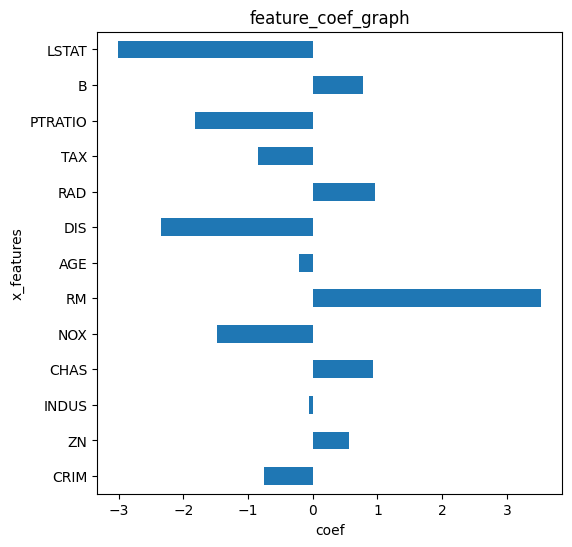

In [89]:
from sklearn.linear_model import Ridge, Lasso
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=47)

alpha = 0.1 #0.1, 0.5

#Ridge Class Object 생성(깡통모델 만들기)
lasso = Lasso(alpha=alpha)

#학습
lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_test)

#lasso
print(lasso.score(x_train, y_train)) #acc
print(lasso.score(x_test, y_test))

print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE",metrics.root_mean_squared_error(y_test, y_pred))
print("MAE",metrics.mean_absolute_error(y_test, y_pred))

print(lasso.coef_)

plt.figure(figsize=(6,6))

# graph values
coefs = lasso.coef_.tolist()
coefs_series = pd.Series(coefs)

#graph info
x_labels = scale_columns
ax = coefs_series.plot.barh()
ax.set_title("feature_coef_graph")
ax.set_xlabel("coef")
ax.set_ylabel("x_features")
ax.set_yticklabels(x_labels)